# Diabetes classification with Neural Network

In [10]:
# Diabetes classification using neural network with Keras Tensorflow
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [11]:
# Load data
data = pd.read_csv('../dataset/diabetes_selected_norm.csv')

In [12]:
# data.explode(['Age', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'],)

In [13]:
# Split train and validation dataset
X = data.iloc[:, 0:len(data.columns)-1].values
y = data.iloc[:, len(data.columns)-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
# Build model function
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(26, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(5, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    # loss with weighted binary cross entropy

    model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.01),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [15]:
# Train model and log history
model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 26)                156       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 135       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 297
Trainable params: 297
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Train model

history = model.fit(X_train,y_train,epochs=400, batch_size=1)

Epoch 1/400
550/550 [==============================] - 1s 2ms/step - loss: 0.6501 - accuracy: 0.6655
Epoch 2/400
550/550 [==============================] - 1s 2ms/step - loss: 0.6168 - accuracy: 0.6818
Epoch 3/400
550/550 [==============================] - 1s 2ms/step - loss: 0.5902 - accuracy: 0.6800
Epoch 4/400
550/550 [==============================] - 1s 2ms/step - loss: 0.5536 - accuracy: 0.7200
Epoch 5/400
550/550 [==============================] - 1s 2ms/step - loss: 0.5185 - accuracy: 0.7491
Epoch 6/400
550/550 [==============================] - 1s 2ms/step - loss: 0.4905 - accuracy: 0.7891
Epoch 7/400
550/550 [==============================] - 1s 2ms/step - loss: 0.4764 - accuracy: 0.7945
Epoch 8/400
550/550 [==============================] - 1s 2ms/step - loss: 0.4686 - accuracy: 0.7964
Epoch 9/400
550/550 [==============================] - 1s 2ms/step - loss: 0.4676 - accuracy: 0.7873
Epoch 10/400
550/550 [==============================] - 1s 2ms/step - loss: 0.4600 - accura

## Training history

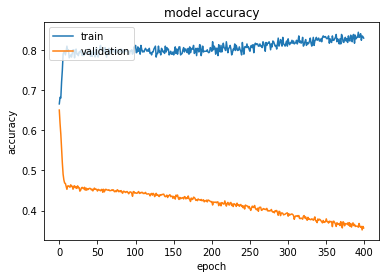

In [17]:
# Plot training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [18]:
# Model evaluation
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

5/5 [==============================] - 0s 4ms/step - loss: 0.7239 - accuracy: 0.6884
Test accuracy: 0.6884058117866516


In [19]:
# re-train model with weights
from sklearn.utils import class_weight
weights = class_weight.compute_class_weight('balanced',
                                            classes = np.unique(y_train),
                                            y = y_train)
weights = {0:weights[0], 1:weights[1]}
print(weights)

{0: 0.7333333333333333, 1: 1.5714285714285714}


In [20]:
# Train model and log history
model2 = build_model()
model2.summary()
history2 = model2.fit(X_test, y_test,epochs=400, batch_size=1, class_weight=weights)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 26)                156       
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 135       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 6         
Total params: 297
Trainable params: 297
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/400
138/138 [==============================] - 1s 2ms/step - loss: 0.6992 - accuracy: 0.3768
Epoch 2/400
138/138 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.3986
Epoch 3/400
138/138 [=========================

In [21]:
# Model evaluation
test_loss2, test_acc2 = model2.evaluate(X_test,y_test)
print('Test accuracy:', test_acc2)

5/5 [==============================] - 0s 4ms/step - loss: 0.3059 - accuracy: 0.8623
Test accuracy: 0.8623188138008118


[[66 20]
 [23 29]]


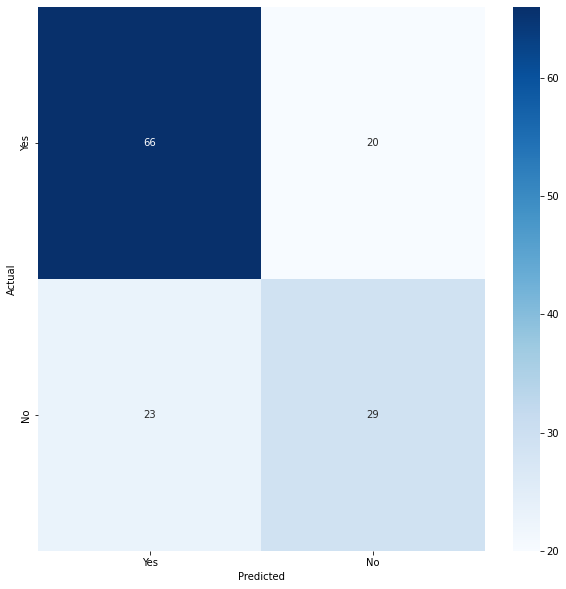

              precision    recall  f1-score   support

           0       0.74      0.77      0.75        86
           1       0.59      0.56      0.57        52

    accuracy                           0.69       138
   macro avg       0.67      0.66      0.66       138
weighted avg       0.69      0.69      0.69       138

[[72 14]
 [ 5 47]]


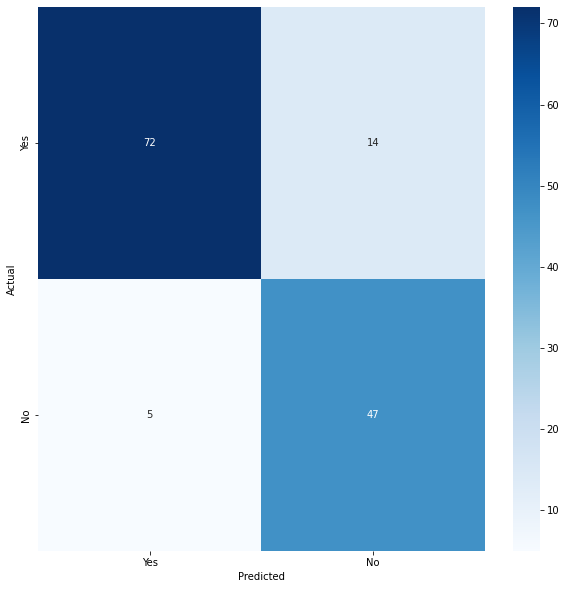

              precision    recall  f1-score   support

           0       0.94      0.84      0.88        86
           1       0.77      0.90      0.83        52

    accuracy                           0.86       138
   macro avg       0.85      0.87      0.86       138
weighted avg       0.87      0.86      0.86       138



In [22]:
# Calculate confusion matrix TP, FP, TN, FN
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

# Visualize confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
fig, ax = plt.subplots(figsize=(10,10))
# Set up the matplotlib figure
sns.heatmap(conf_mat,  cmap='Blues', annot=True, fmt='d',
            xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(classification_report(y_test, y_pred))


y_pred = model2.predict(X_test)
y_pred = (y_pred > 0.5)
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

# Visualize confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
fig, ax = plt.subplots(figsize=(10,10))
# Set up the matplotlib figure
sns.heatmap(conf_mat,  cmap='Blues', annot=True, fmt='d',
            xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


print(classification_report(y_test, y_pred))





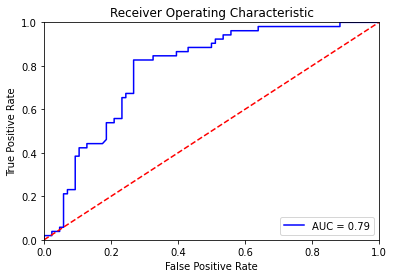

In [25]:
# Plot AUC
from sklearn.metrics import roc_curve, auc

y_pred = model.predict(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

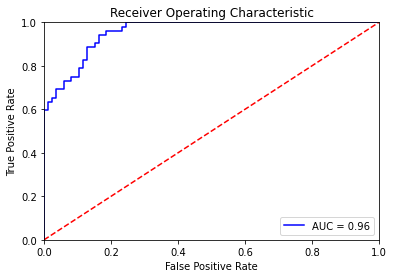

In [26]:
y_pred = model2.predict(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()